# Mini Project 3

**2025 Introduction to Quantitative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:* The *rate of change* of the Black-Scholes call option price with respect to time is given by the derivative $\frac{\partial C(t)}{\partial t}$. We consider this rate of change in the context of the current asset price $S(0)$, the strike price $K$, and the volatility $\sigma$.
  - For $S(0)$ relatively close to $K$, the rate of change near $t = 0$ is a large positive number. As time progresses, the rate of change decreases while staying positive. As time increases indefinitely, the rate of change tends to zero.
  - If $S(0) = K$, then the rate of change near $t = 0$ is a positive number, not particularly large but also not approximately zero. As time progresses, the rate of change decreases while staying positive.
  - For $S(0)$ relatively far away from $K$, the rate of change near $t = 0$ is a small positive number; it is approximately zero. As time progresses, the rate of change increases and approaching a positive finite limiting value.
  - For our above commentary, we can measure how close $S(0)$ is to $K$ in terms of the volatility. Namely, our cases depend on the size of $\frac{|S(0)-K|}{\sigma}$. If $S(0) \neq K$ and $\sigma$ is arbitrarily small, then the rate of change is approximately zero, and we are in the third case mentioned  above. If $S(0) \neq K$ and $\sigma$ is arbitrarily large, then the rate of change is a large positive number initially, and it tends towards zero as time increases indefinitely. We are in the first case mentioned above.
- *Call Option – Spot Price Sensitivity:* The *rate of change* of the Black-Scholes call option price with respect to the spot price is given by the derivative $\frac{\partial C(t)}{\partial S(0)}$. We examine this rate of change in the context of the volatility $\sigma$.
  - As the volatility approaches zero, the graph of $C(t)$ vs. $S(0)$ appears to produce a kink at $S(0) = K$. In the limit as the volatility approaches zero, the rate of change is zero for $S(0) < K$, undefined for $S(0) = K$, and one for $S(0) > K$.
  - Fix $\sigma$ to be a positive number, neither arbitrary small nor arbitrarily large. When the spot price is much lower than the strike price, the rate of change is approximately zero. As the spot price increases, the rate of change increases, becoming more positive. The rate of change approaches a positive finite limiting value (one) as the spot price increases indefinitely. 
  - For arbitrarily large volatility, the rate of change is one for all $S(0) > 0$.
- *Put Option – Time Sensitivity:* The *rate of change* of the Black-Scholes put option price with respect to time is given by the derivative $\frac{\partial P(t)}{\partial t}$. We consider this rate of change in the context of the current asset price $S(0)$, the strike price $K$, and the volatility $\sigma$. The behavior for the put option is the same as for the call option, so we copy our remarks below.
  - For $S(0)$ relatively close to $K$, the rate of change near $t = 0$ is a large positive number. As time progresses, the rate of change decreases while staying positive. As time increases indefinitely, the rate of change tends to zero.
  - If $S(0) = K$, then the rate of change near $t = 0$ is a positive number, not particularly large but also not approximately zero. As time progresses, the rate of change decreases while staying positive.
  - For $S(0)$ relatively far away from $K$, the rate of change near $t = 0$ is a small positive number; it is approximately zero. As time progresses, the rate of change increases and approaching a positive finite limiting value.
  - For our above commentary, we can measure how close $S(0)$ is to $K$ in terms of the volatility. Namely, our cases depend on the size of $\frac{|S(0)-K|}{\sigma}$. If $S(0) \neq K$ and $\sigma$ is arbitrarily small, then the rate of change is approximately zero, and we are in the third case mentioned  above. If $S(0) \neq K$ and $\sigma$ is arbitrarily large, then the rate of change is a large positive number initially, and it tends towards zero as time increases indefinitely. We are in the first case mentioned above.
- *Put Option – Spot Price Sensitivity:* The *rate of change* of the Black-Scholes put option price with respect to the spot price is given by the derivative $\frac{\partial P(t)}{\partial S(0)}$. We examine this rate of change in the context of the volatility $\sigma$.
  - As the volatility approaches zero, the graph of $P(t)$ vs. $S(0)$ appears to produce a kink at $S(0) = K$. In the limit as the volatility approaches zero, the rate of change is negative one for $S(0) < K$, undefined for $S(0) = K$, and zero for $S(0) > K$.
  - Fix $\sigma$ to be a positive number, neither arbitrary small nor arbitrarily large. When the spot price is much lower than the strike price, the rate of change is close to a fixed negative number (negative one). As the spot price increases, the rate of change increases, staying negative while getting closer to zero. The rate of change approaches zero as the spot price increases indefinitely. 
  - For arbitrarily large volatility, the rate of change is zero for all $S(0) > 0$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

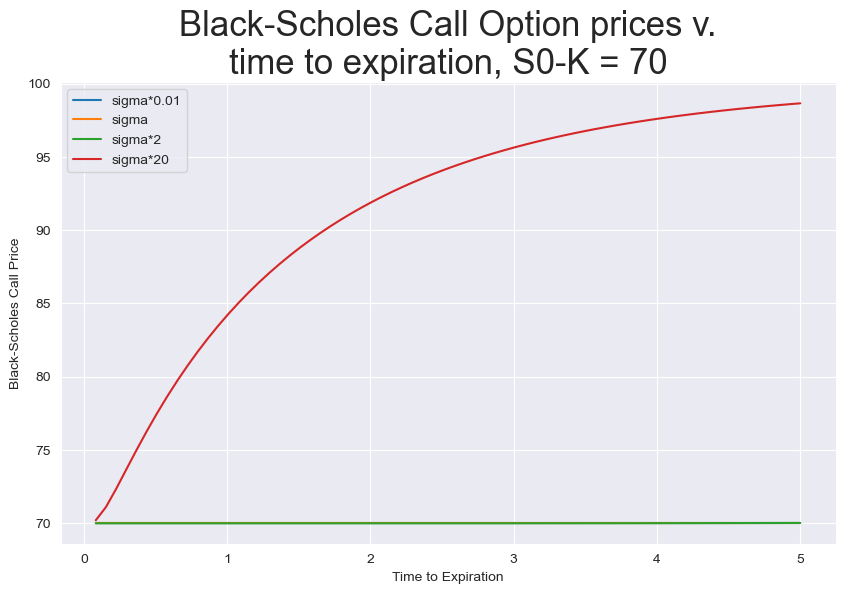

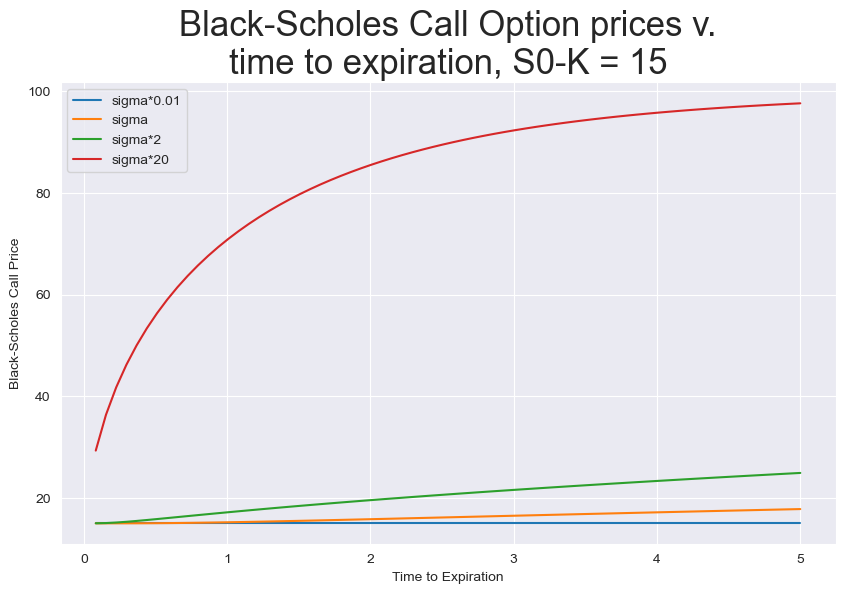

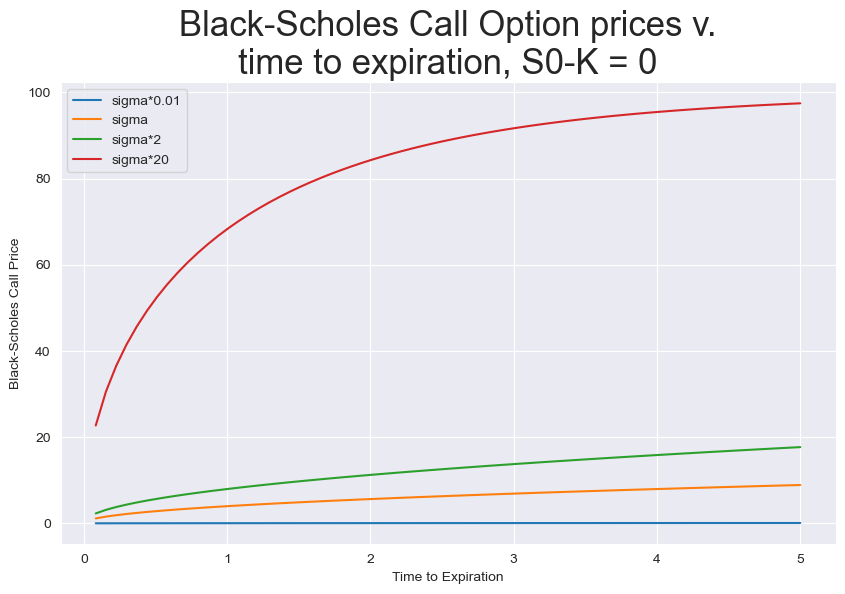

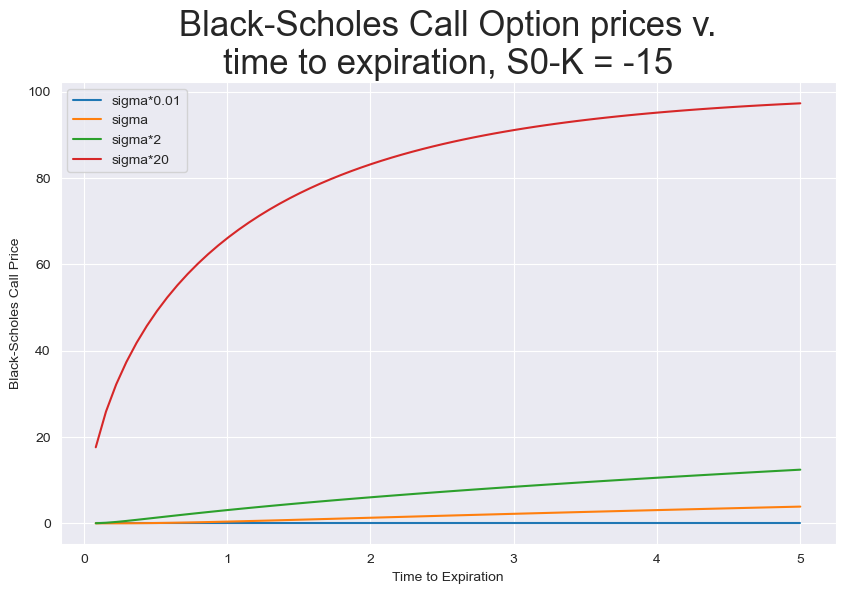

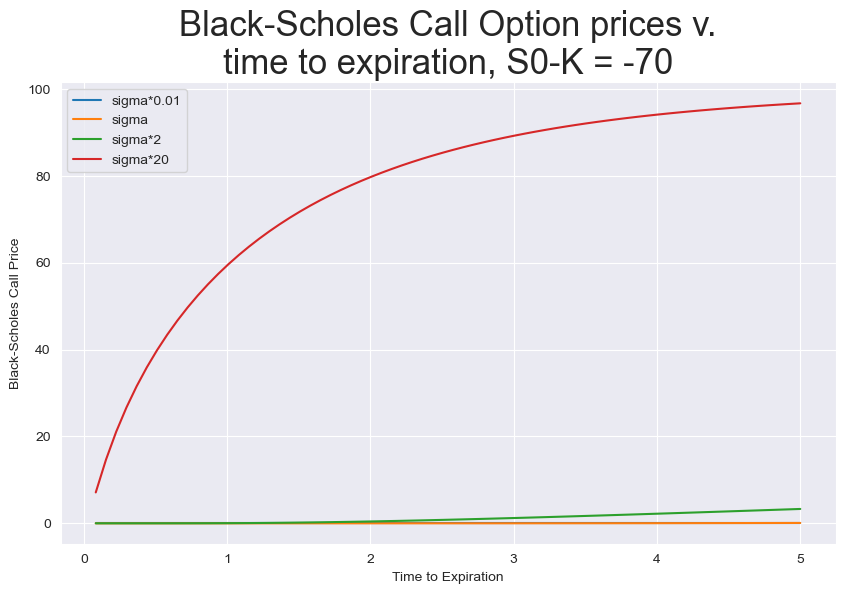

In [15]:
S0 = 100
K_vals = [30, 85, 100, 115, 170]
sigma = .1
times = np.linspace(1/12, 5, 70)

for K in K_vals:
    call_prices0 = [bs_call(S0,K,sigma*0.01, t = times[i]) for i in range(len(times))]
    call_prices1 = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
    call_prices2 = [bs_call(S0,K,sigma*2, t = times[i]) for i in range(len(times))]
    call_prices3 = [bs_call(S0,K,sigma*20, t = times[i]) for i in range(len(times))]
    
    
    plt.figure(figsize = (10,6))
    plt.title(f'Black-Scholes Call Option prices v.\ntime to expiration, S0-K = {S0-K}', size = 25)
    plt.plot(times, call_prices0, label="sigma*0.01")
    plt.plot(times, call_prices1, label="sigma")
    plt.plot(times, call_prices2, label="sigma*2")
    plt.plot(times, call_prices3, label="sigma*20")
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Call Price')
    plt.legend()
    plt.show()

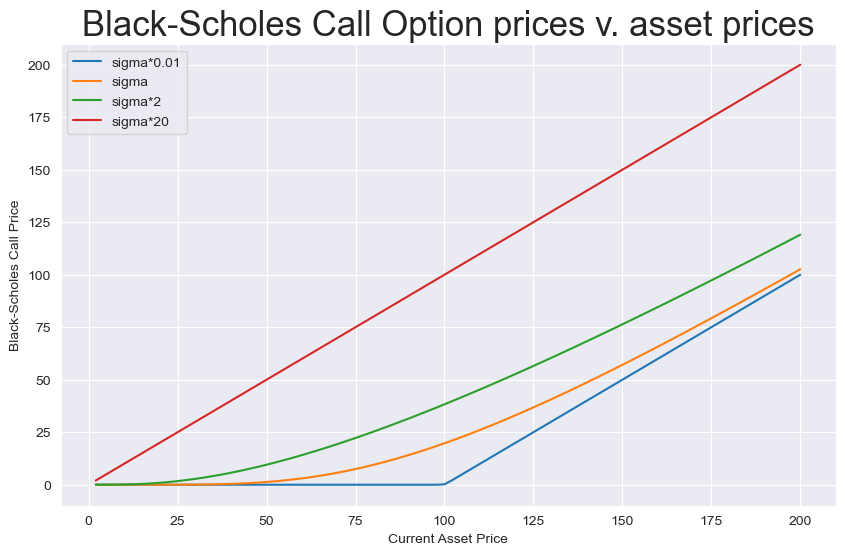

In [17]:
S0_vals = np.linspace(2, 200, 100)
K = 100
sigma = .5
time = 1


call_prices0 = [bs_call(S0_vals[i], K, sigma*0.01) for i in range(len(S0_vals))]
call_prices1 = [bs_call(S0_vals[i], K, sigma) for i in range(len(S0_vals))]
call_prices2 = [bs_call(S0_vals[i], K, sigma*2) for i in range(len(S0_vals))]
call_prices3 = [bs_call(S0_vals[i], K, sigma*20) for i in range(len(S0_vals))]


plt.figure(figsize = (10,6))
plt.title('Black-Scholes Call Option prices v. asset prices', size = 25)
plt.plot(S0_vals, call_prices0, label="sigma*0.01")
plt.plot(S0_vals, call_prices1, label="sigma")
plt.plot(S0_vals, call_prices2, label="sigma*2")
plt.plot(S0_vals, call_prices3, label="sigma*20")
plt.xlabel('Current Asset Price')
plt.ylabel('Black-Scholes Call Price')
plt.legend()
plt.show()

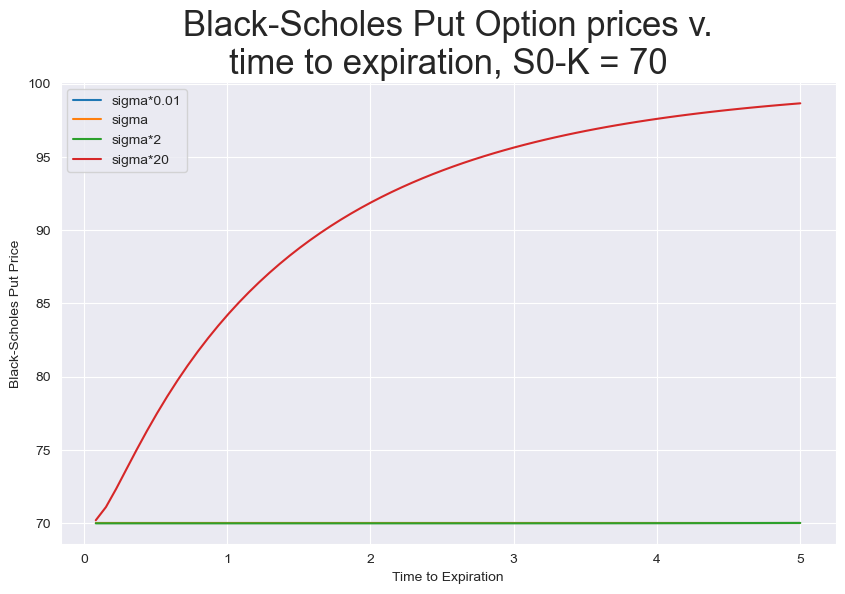

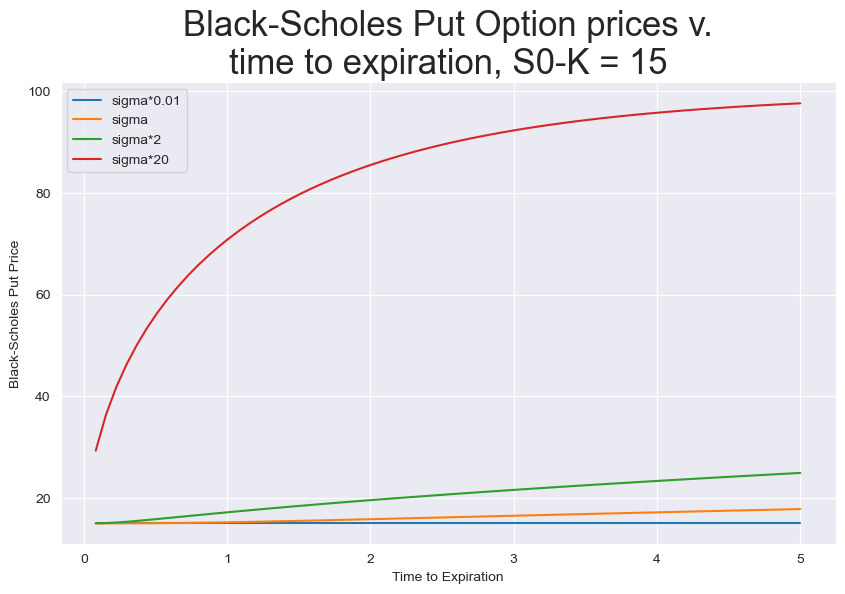

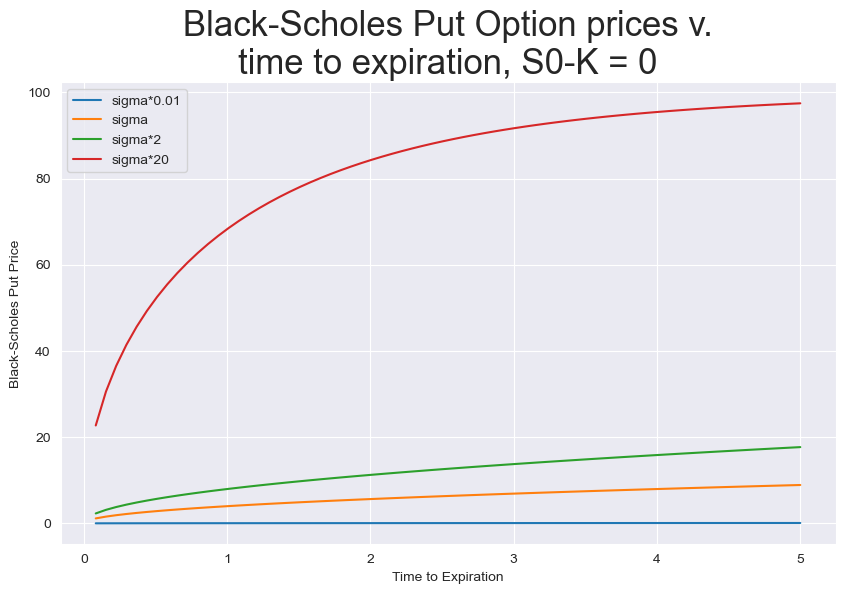

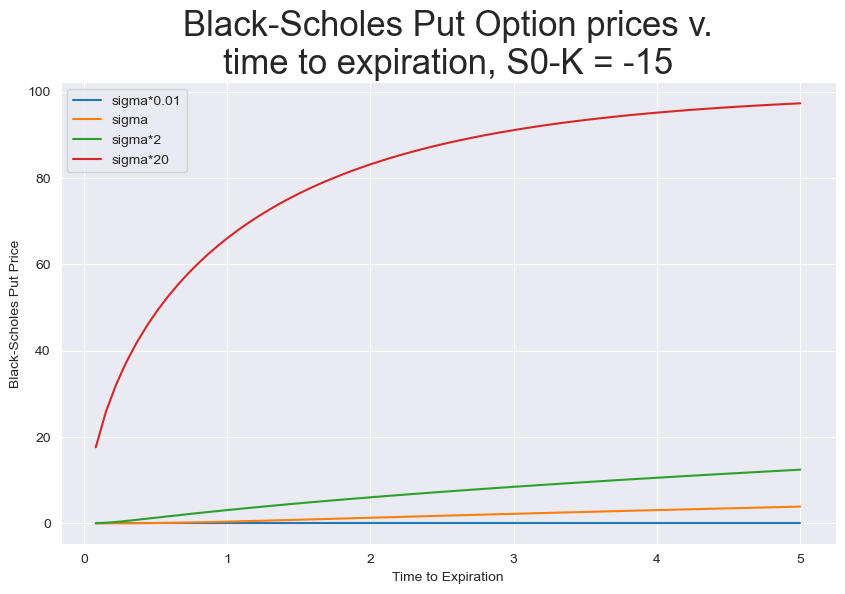

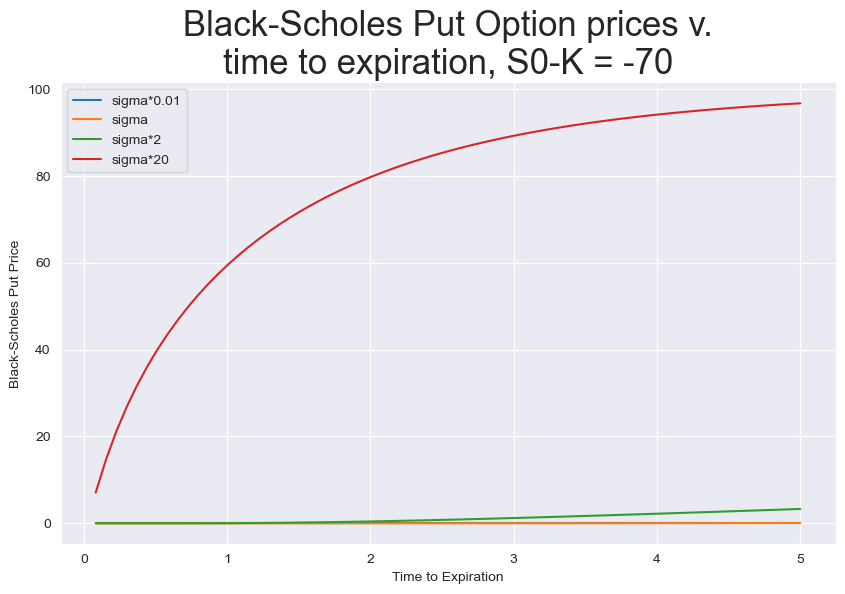

In [16]:
S0 = 100
K_vals = [30, 85, 100, 115, 170]
sigma = .1
times = np.linspace(1/12, 5, 70)

for K in K_vals:
    put_prices0 = [bs_call(S0,K,sigma*0.01, t = times[i]) for i in range(len(times))]
    put_prices1 = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
    put_prices2 = [bs_call(S0,K,sigma*2, t = times[i]) for i in range(len(times))]
    put_prices3 = [bs_call(S0,K,sigma*20, t = times[i]) for i in range(len(times))]
    
    
    plt.figure(figsize = (10,6))
    plt.title(f'Black-Scholes Put Option prices v.\ntime to expiration, S0-K = {S0-K}', size = 25)
    plt.plot(times, put_prices0, label="sigma*0.01")
    plt.plot(times, put_prices1, label="sigma")
    plt.plot(times, put_prices2, label="sigma*2")
    plt.plot(times, put_prices3, label="sigma*20")
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Put Price')
    plt.legend()
    plt.show()

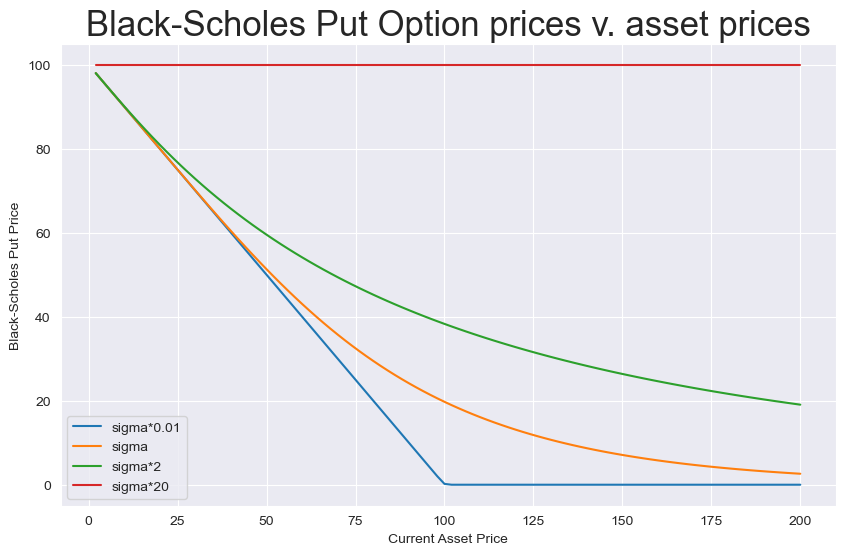

In [18]:
S0_vals = np.linspace(2, 200, 100)
K = 100
sigma = .5
time = 1


put_prices0 = [bs_put(S0_vals[i], K, sigma*0.01) for i in range(len(S0_vals))]
put_prices1 = [bs_put(S0_vals[i], K, sigma) for i in range(len(S0_vals))]
put_prices2 = [bs_put(S0_vals[i], K, sigma*2) for i in range(len(S0_vals))]
put_prices3 = [bs_put(S0_vals[i], K, sigma*20) for i in range(len(S0_vals))]


plt.figure(figsize = (10,6))
plt.title('Black-Scholes Put Option prices v. asset prices', size = 25)
plt.plot(S0_vals, put_prices0, label="sigma*0.01")
plt.plot(S0_vals, put_prices1, label="sigma")
plt.plot(S0_vals, put_prices2, label="sigma*2")
plt.plot(S0_vals, put_prices3, label="sigma*20")
plt.xlabel('Current Asset Price')
plt.ylabel('Black-Scholes Put Price')
plt.legend()
plt.show()